# **Import Libraries**

First, import the necessary libraries for data manipulation, visualization, and model building.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# **Load the Dataset**

Load the credit card transaction dataset. For this example, we will use a dataset where 'Class' is the target variable (0 for genuine and 1 for fraudulent transactions).

In [2]:
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Inspect the dataset
print(data.head())




   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(data.describe())

               Time            V1            V2            V3            V4  \
count  19898.000000  19898.000000  19898.000000  19898.000000  19898.000000   
mean   15492.416374     -0.244326      0.242420      0.745774      0.277011   
std    10512.066686      1.889986      1.527342      1.767726      1.466218   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     4536.250000     -0.959632     -0.329008      0.309235     -0.636713   
50%    14796.000000     -0.302521      0.220079      0.898672      0.224608   
75%    26220.500000      1.164473      0.870117      1.532922      1.142143   
max    30633.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  19898.000000  19898.000000  19898.000000  19898.000000  19898.000000   
mean      -0.163264      0.092881     -0.145279      0.022237      0.636382   
std        1.430821      1.331029      1.338260    

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

# **Data Pre-processing**

Handle missing values (if any), and normalize the transaction data.

In [5]:
# Check for missing values
print(data.isnull().sum())

# Drop missing values or fill them with appropriate values
data = data.dropna()

# Standardize the 'Amount' column (or any other numerical columns as needed)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


<ipython-input-5-5e25c28d47e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = scaler.fit_transform(data[['Amount']])


# **Handle Class Imbalance**

Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or RandomUnderSampler to handle class imbalance.

In [6]:
# Define features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Use SMOTE to handle class imbalance
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)

# Alternatively, use RandomUnderSampler
undersample = RandomUnderSampler()
X_res, y_res = undersample.fit_resample(X, y)


# **Split the Dataset**

Split the dataset into training and testing sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


# **Train the Model**

Train a classification model, such as logistic regression or random forests.

In [8]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

# **Evaluate the Model**

Evaluate the model's performance using metrics like precision, recall, and F1-score.

In [9]:
# Predictions
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluation for Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))

# Evaluation for Random Forest
print("Random Forest:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        26
         1.0       0.92      0.96      0.94        25

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51

Confusion Matrix:
 [[24  2]
 [ 1 24]]
Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        26
         1.0       1.00      0.96      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51

Confusion Matrix:
 [[26  0]
 [ 1 24]]


# **Plot Results**

Visualize the results to get a better understanding of the model's performance.

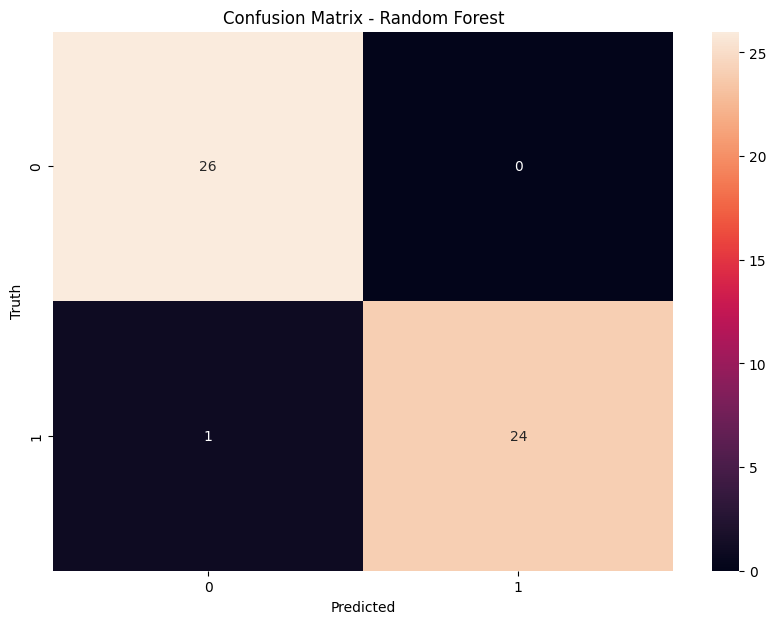

In [10]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# **Fine-Tuning**

Consider techniques like hyperparameter tuning to further improve the model's performance. Use cross-validation for more reliable performance estimates.

In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
